[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1D9Y8bgZpdqJmHqeJeyQ4CPQvsuEnf09X#scrollTo=Soo7kmdb5bJR)

## **Conexión con Kaggle para abrir fácilmente los datasets.**

Se añaden los códigos para poder subir los datasets, el procedimiento fue el siguiente:

1. Entramos a nuestra cuenta de Kaggle, Settings y luego en API (Create new Token).
2. El paso anterior me descarga un archivo .Json que contiene mi nombre de cuenta y una llave (Esto se subió a este Notebook).
3. Se añadieron los códigos siguientes y en el último se debe poner el nombre de la competición que se encuentra al final de la sección "Data" de la misma competición.


In [ ]:
!pip install kaggle
!mkdir ~/.kaggle #Se instala la librería de Kaggle
!touch ~/.kaggle/kaggle.json
# Generado desde la página de Kaggle
api_token ={"username":"josealejandrourrego","key":"c42e706678df9b3283b5473dbe2c0c8a"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c DontGetKicked
!unzip DontGetKicked.zip #Se descomprime el archivo .zip donde está el dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 78% 8.00M/10.2M [00:01<00:00, 12.8MB/s]
100% 10.2M/10.2M [00:01<00:00, 9.41MB/s]
Archive:  DontGetKicked.zip
  inflating: Carvana_Data_Dictionary.txt  
  inflating: example_entry.csv       
  inflating: test.csv                
  inflating: test.zip                
  inflating: training.csv            
  inflating: training.zip            


# **1. Importación de librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **2. Llamado a los datos**

In [ ]:
#Este primer archivo txt contiene todas las variables con su explicación para el desarrollo de los modelos
características= open("Carvana_Data_Dictionary.txt")
print(características.read())

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

In [ ]:
data=pd.read_csv("training.csv") # Dataset que contiene el 60% de los datos totales (destinados a entrenamiento)
#Los datos totales train + test son 121756
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


# **3. Análisis exploratorio de los datos**

In [ ]:
# Se muestran 5 filas aleatorias de entre todos los datos de entrenamiento
data.sample(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
61826,61856,0,2/12/2010,ADESA,2006,4,FORD,FIVE HUNDRED,SE,4D SEDAN SE,...,10265.0,11499.0,NaN,NaN,23359,91752,CA,7290.0,0,1313
253,254,0,5/10/2010,ADESA,2004,6,CHRYSLER,PACIFICA FWD,NaN,4D SPORT TOURER,...,9528.0,10911.0,NaN,NaN,19638,33619,FL,8300.0,0,1389
57860,57889,0,4/28/2010,ADESA,2007,3,CHEVROLET,COBALT,LS,4D SEDAN LS,...,9081.0,10015.0,NaN,NaN,22808,77086,TX,6620.0,0,728
18749,18761,0,1/27/2009,MANHEIM,2004,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,4D SEDAN,...,4861.0,6012.0,NaN,NaN,22916,80022,CO,6280.0,0,1500
6269,6276,1,4/29/2010,MANHEIM,2006,4,CHEVROLET,COBALT,LS,4D SEDAN LS,...,7448.0,9091.0,NaN,NaN,18881,30272,GA,5430.0,0,853


In [ ]:
# Se revisa si existen valores nulos o faltantes de entre todos los tipos de variables (Numéricas + Categóricas)
data.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

De la línea de código anterior se puede concluir que existen muchos datos nulos o faltantes en específicamente 5 variables
1. Trim: Nivel de equipamiento del vehículo
2. Wheel Type y Wheel type ID: tipo de ruedas con su ID
3. PRIMEUNIT: Identifica si el vehículo en cuestión tiene una demanda elevada
4. AUCGUART: Nivel de garantía otorgada por la subasta para el vehículo

De este primer análisis se concluye que las variables que involucran algún reporte por parte de la subasta sobre el estado pasado (1), presente (2,3) y futuro (4) del vehículo subastado tiene muchos datos faltantes ya sea por negligencia o con el objetivo de sacar algún provecho por parte de la subasta ocultando estos datos



In [ ]:
#En este caso se comprueban el % de datos faltantes con respecto a la cantidad total de datos
Faltantes=data.isna().sum().sum()
totales=72982*33 #Tomado del dataframe
Porcentaje_Faltantes=(Faltantes/totales)*100
Porcentaje_Faltantes #El 6.19% de todos los datos son faltantes

6.195093352200584

**A continuación, se presentan los análisis de datos según su tipo (numéricos y categóricos**

# **4. Análisis de datos categóricos**




In [ ]:
#En primer lugar, determinamos cuales y cuantas de las variables del dataset son categóricas
datos_categoricos = data.select_dtypes(include=['object','category'])
datos_categoricos

,PurchDate,Auction,Make,Model,Trim,SubModel,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART,VNST
0,12/7/2009,ADESA,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,Alloy,OTHER ASIAN,MEDIUM,OTHER,NaN,NaN,FL
1,12/7/2009,ADESA,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,AMERICAN,LARGE TRUCK,CHRYSLER,NaN,NaN,FL
2,12/7/2009,ADESA,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,Covers,AMERICAN,MEDIUM,CHRYSLER,NaN,NaN,FL
3,12/7/2009,ADESA,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,COMPACT,CHRYSLER,NaN,NaN,FL
4,12/7/2009,ADESA,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,Covers,AMERICAN,COMPACT,FORD,NaN,NaN,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,12/2/2009,ADESA,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,Alloy,AMERICAN,MEDIUM,FORD,NaN,NaN,GA
72979,12/2/2009,ADESA,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,AMERICAN,MEDIUM,GM,NaN,NaN,GA
72980,12/2/2009,ADESA,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,Alloy,AMERICAN,MEDIUM SUV,CHRYSLER,NaN,NaN,GA
72981,12/2/2009,ADESA,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,Alloy,AMERICAN,LARGE,GM,NaN,NaN,GA


In [ ]:
porcentaje_categoricos=(14/33)*100  #(Tipos de datos categóricos/Tipos de datos totales) *100
porcentaje_categoricos #Por lo tanto el 40% approx de los datos totales son categóricos

42.42424242424242

In [ ]:
# Analizamos los datos nulos o inexistentes dentro de los tipos de variable categóricos
datos_categoricos.isna().sum()

PurchDate                   0
Auction                     0
Make                        0
Model                       0
Trim                     2360
SubModel                    8
Color                       8
Transmission                9
WheelType                3174
Nationality                 5
Size                        5
TopThreeAmericanName        5
PRIMEUNIT               69564
AUCGUART                69564
VNST                        0
dtype: int64

De la línea de condigo anterior se decide eliminar las variables PRIMEUNIT AUCGUART, WheelType y Trim debido a la cantidad tan alta de datos faltantes lo cual ocasionaría un mal entrenamiento de los modelos posteriores.

Además: Para el caso del análisis de variables categóricos solo se tendrán en cuenta 6 de las 14 variables categóricas (Razones y argumentos justificados en el informe).

A continuación, se enumeran las 6 variables categóricas elegidas:

1. Auction
2. Make
3. Color
4. Nationality
5. Size
6. VNST

NOTA: Vale la aclaración que dichas variables se enfrentaran con la variable objetivo, es decir, IsBadBuy.


In [ ]:
#Se eliminan las variables que no son de interés del dataframe
dfcategoricos=datos_categoricos.drop(["PurchDate","Trim","Transmission","WheelType","TopThreeAmericanName","PRIMEUNIT","AUCGUART","Model","SubModel"],axis=1)
dfcategoricos["IsBadBuy"]=data["IsBadBuy"] #Se añade al dataframe construido la variable objetivo
dfcategoricos

,Auction,Make,Color,Nationality,Size,VNST,IsBadBuy
0,ADESA,MAZDA,RED,OTHER ASIAN,MEDIUM,FL,0
1,ADESA,DODGE,WHITE,AMERICAN,LARGE TRUCK,FL,0
2,ADESA,DODGE,MAROON,AMERICAN,MEDIUM,FL,0
3,ADESA,DODGE,SILVER,AMERICAN,COMPACT,FL,0
4,ADESA,FORD,SILVER,AMERICAN,COMPACT,FL,0
...,...,...,...,...,...,...,...
72978,ADESA,MERCURY,BLACK,AMERICAN,MEDIUM,GA,1
72979,ADESA,CHEVROLET,SILVER,AMERICAN,MEDIUM,GA,0
72980,ADESA,JEEP,SILVER,AMERICAN,MEDIUM SUV,GA,0
72981,ADESA,CHEVROLET,WHITE,AMERICAN,LARGE,GA,0


A continuación, se realizan gráficos de barras para las variables categóricas de interés con el objetivo de medir cuales de los datos presentes en las variables tienen más información de "BadBuy"  

In [ ]:
#Se realizan los diagramas de barras para todas las variables de interés comparándolas con la variable objetivo (IsBadBuy)

Variables_categoricas=["Auction","Make","Color","Nationality","Size","VNST"]

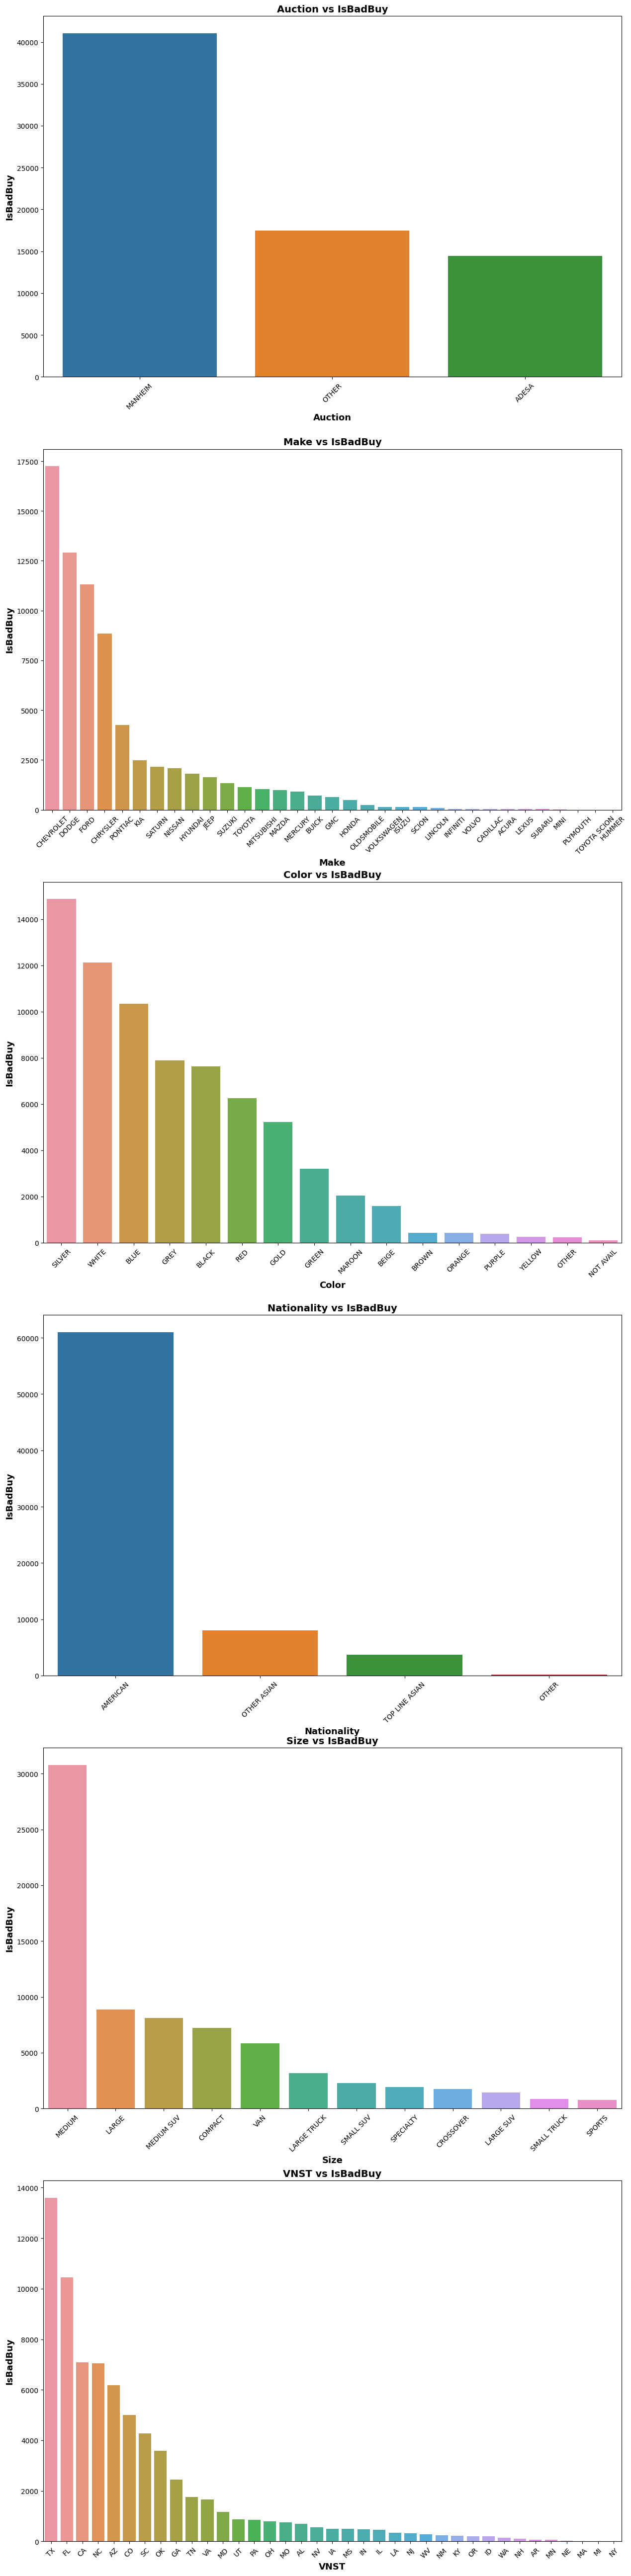

In [ ]:
fig,ax=plt.subplots(6,1,figsize=(15,66))
for i,j in enumerate(Variables_categoricas):
  plt.subplot(6,1,i+1)
  termino=dfcategoricos[[j,"IsBadBuy"]].dropna()
  cantidad = termino[j].value_counts()
  sns.barplot(x=cantidad.index, y=cantidad.values)
  plt.title(j+" vs IsBadBuy",size=14,weight="bold")
  plt.xticks(rotation=45)
  plt.xlabel(j,size=13,weight="bold")
  plt.ylabel("IsBadBuy",size=13,weight="bold")


# **5. Análisis de datos numéricos**



En primer lugar, determinamos cuales, y cuantas de las variables del dataset son numéricas, también se elimina la variable numérica WheelTypeID ya que Su contraparte categórica no nos brindó mucha información además de tener muchos datos faltantes, además, se elimina igualmente la variable numérica VNZIP1 que corresponde al código postal donde se compró el auto, por considerarlo innecesario ya que se conoce el estado donde se realizó la transacción "VNST" la cual es una variable categórica


In [ ]:
datos_numericos = data._get_numeric_data().drop(["RefId","WheelTypeID","VNZIP1"],axis=1)
datos_numericos

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
0,0,2006,3,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,7100.0,0,1113
1,0,2004,5,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,7600.0,0,1053
2,0,2005,4,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,4900.0,0,1389
3,0,2004,5,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,4100.0,0,630
4,0,2005,4,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,1,2001,8,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,4200.0,0,993
72979,0,2007,2,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,6200.0,0,1038
72980,0,2005,4,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,8200.0,0,1893
72981,0,2006,3,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,7000.0,0,1974


In [ ]:
# Analizamos los datos nulos o inexistentes dentro de los tipos de variable numéricos
datos_numericos.isna().sum()

IsBadBuy                               0
VehYear                                0
VehicleAge                             0
VehOdo                                 0
MMRAcquisitionAuctionAveragePrice     18
MMRAcquisitionAuctionCleanPrice       18
MMRAcquisitionRetailAveragePrice      18
MMRAcquisitonRetailCleanPrice         18
MMRCurrentAuctionAveragePrice        315
MMRCurrentAuctionCleanPrice          315
MMRCurrentRetailAveragePrice         315
MMRCurrentRetailCleanPrice           315
BYRNO                                  0
VehBCost                               0
IsOnlineSale                           0
WarrantyCost                           0
dtype: int64

In [ ]:
# Se muestran algunas estadísticas de los datos numéricos
datos_numericos.describe()

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,2005.343052,4.176644,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,6730.934326,0.025280,1276.580985
std,0.328425,1.731252,1.712210,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,1767.846435,0.156975,598.846788
min,0.000000,2001.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,1.000000,0.000000,462.000000
25%,0.000000,2004.000000,3.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,5435.000000,0.000000,837.000000
50%,0.000000,2005.000000,4.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,6700.000000,0.000000,1155.000000
75%,0.000000,2007.000000,5.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,7900.000000,0.000000,1623.000000
max,1.000000,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,45469.000000,1.000000,7498.000000


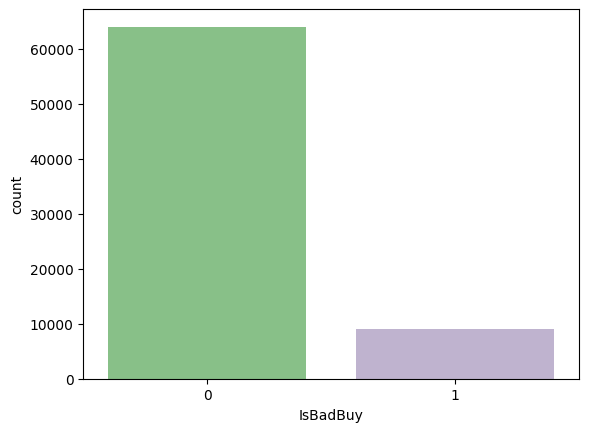

In [ ]:
#En este caso se grafica cuantos de los datos de la variable IsBadBuy son malas o buenas compras, es decir, son 1 o 0
sns.countplot(x='IsBadBuy', palette='Accent', data=datos_numericos)
plt.show()

Del grafico anterior se concluye que la mayoría de las compras fueron buenas, pero hubo approx 10000 compras malas, por lo que si se logra detectar que características tienen estas malas compras se le podrían dar herramientas a las casas de subasta y al comprador para estar más preparados


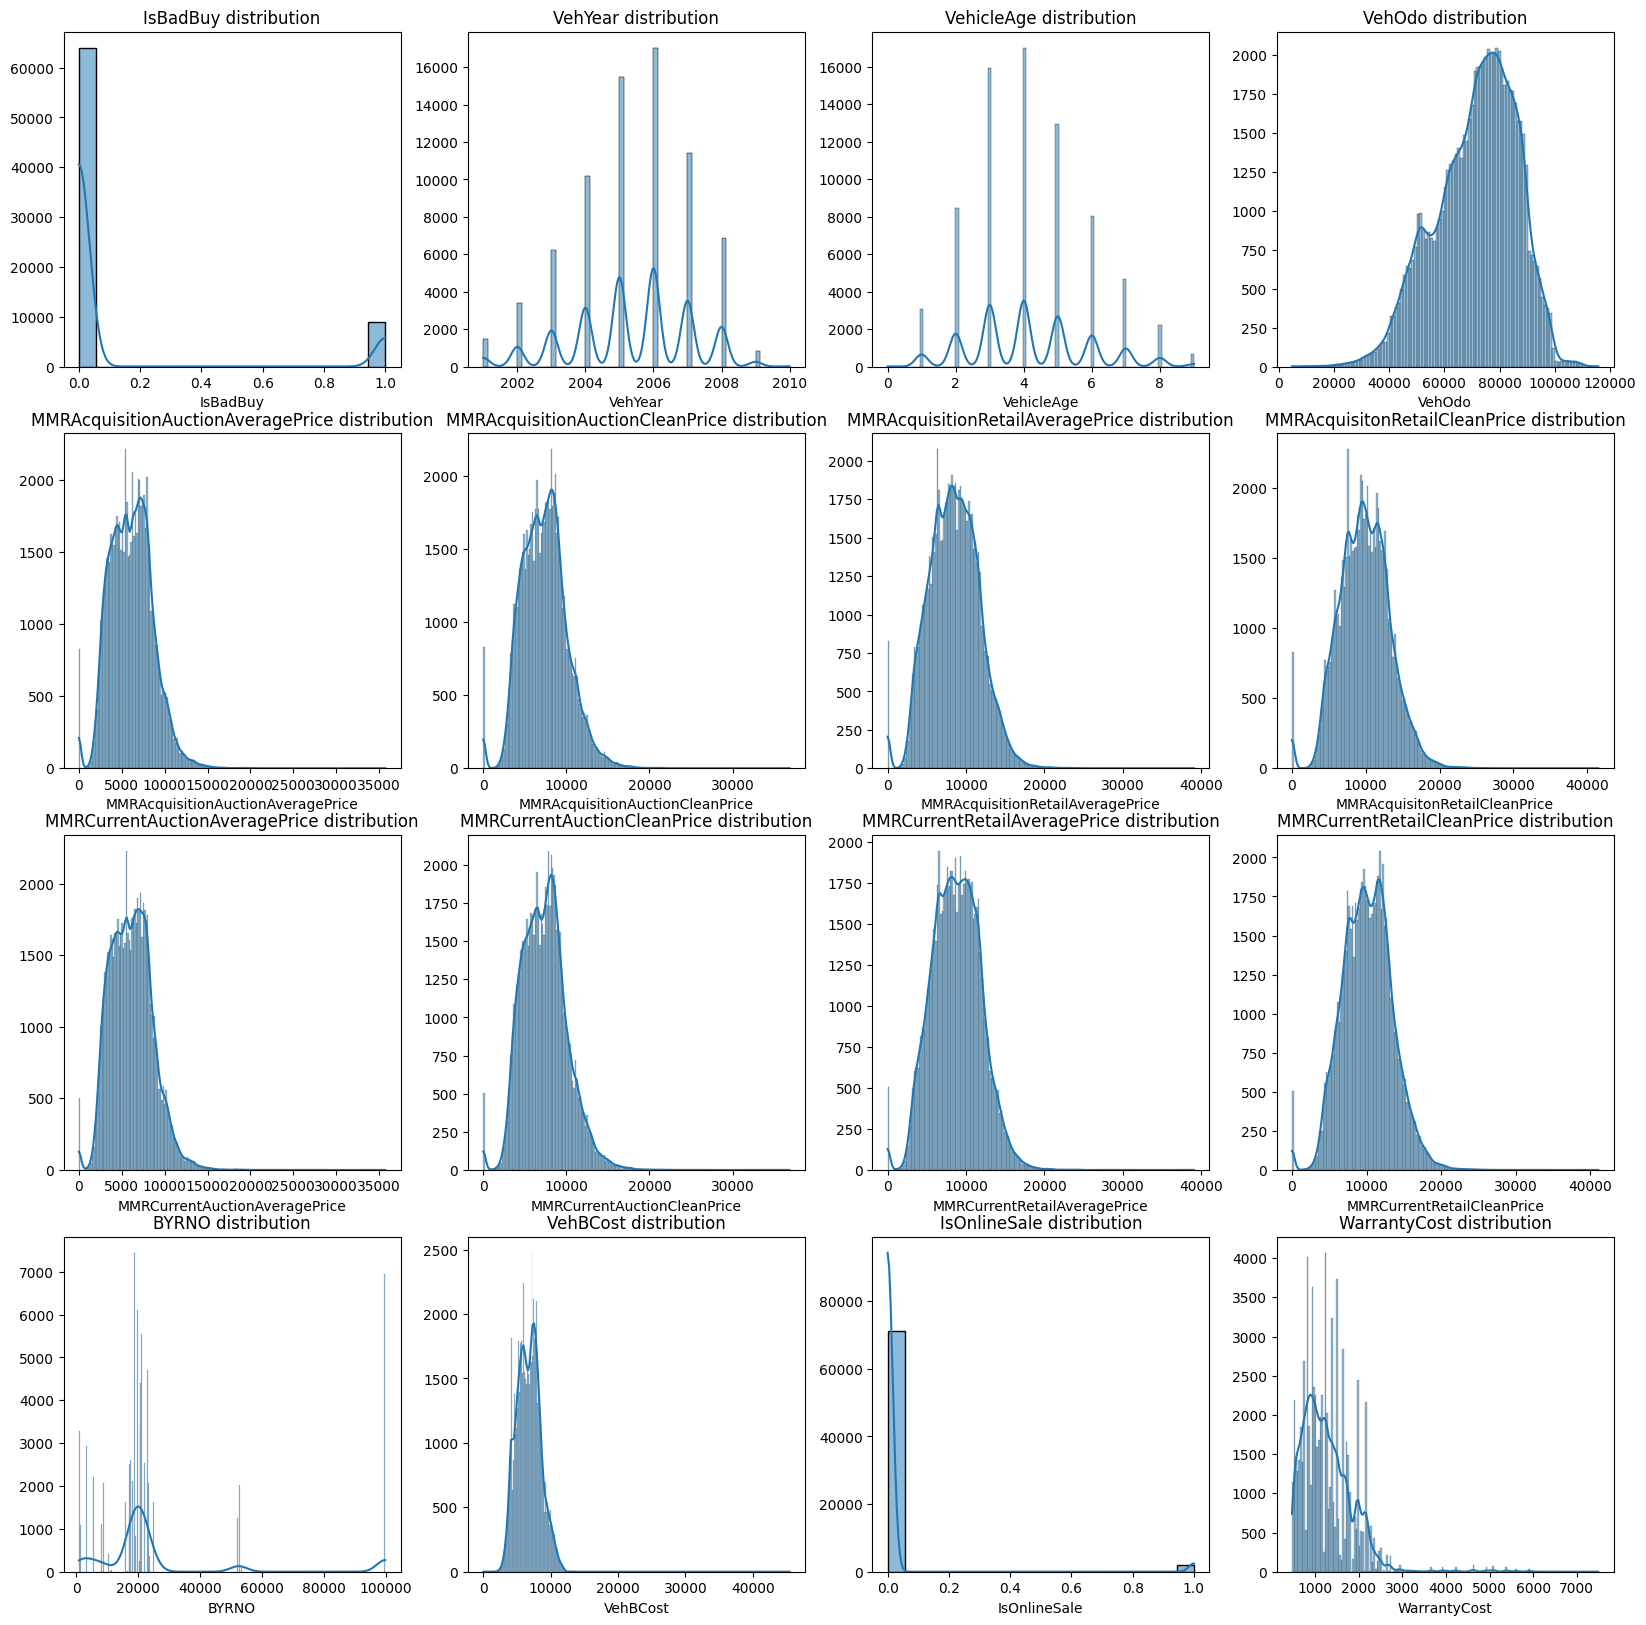

In [ ]:
graphs = datos_numericos.columns.to_list()
fig , ax = plt.subplots(4, 4, figsize=(20, 20))

# Se crea un ciclo for para graficar todas las características de los datos numéricos y conocer la forma de su distribución
for k, z in enumerate(graphs):
    i = k // 4
    j = k % 4
    sns.histplot(x=z, ax=ax[i][j], kde=True, data=datos_numericos)
    ax[i][j].set_title(z + ' distribution')
    ax[i][j].set_ylabel('')
plt.show()

Ahora, se hace el análisis de correlación para determinar si existe alguna entre los datos

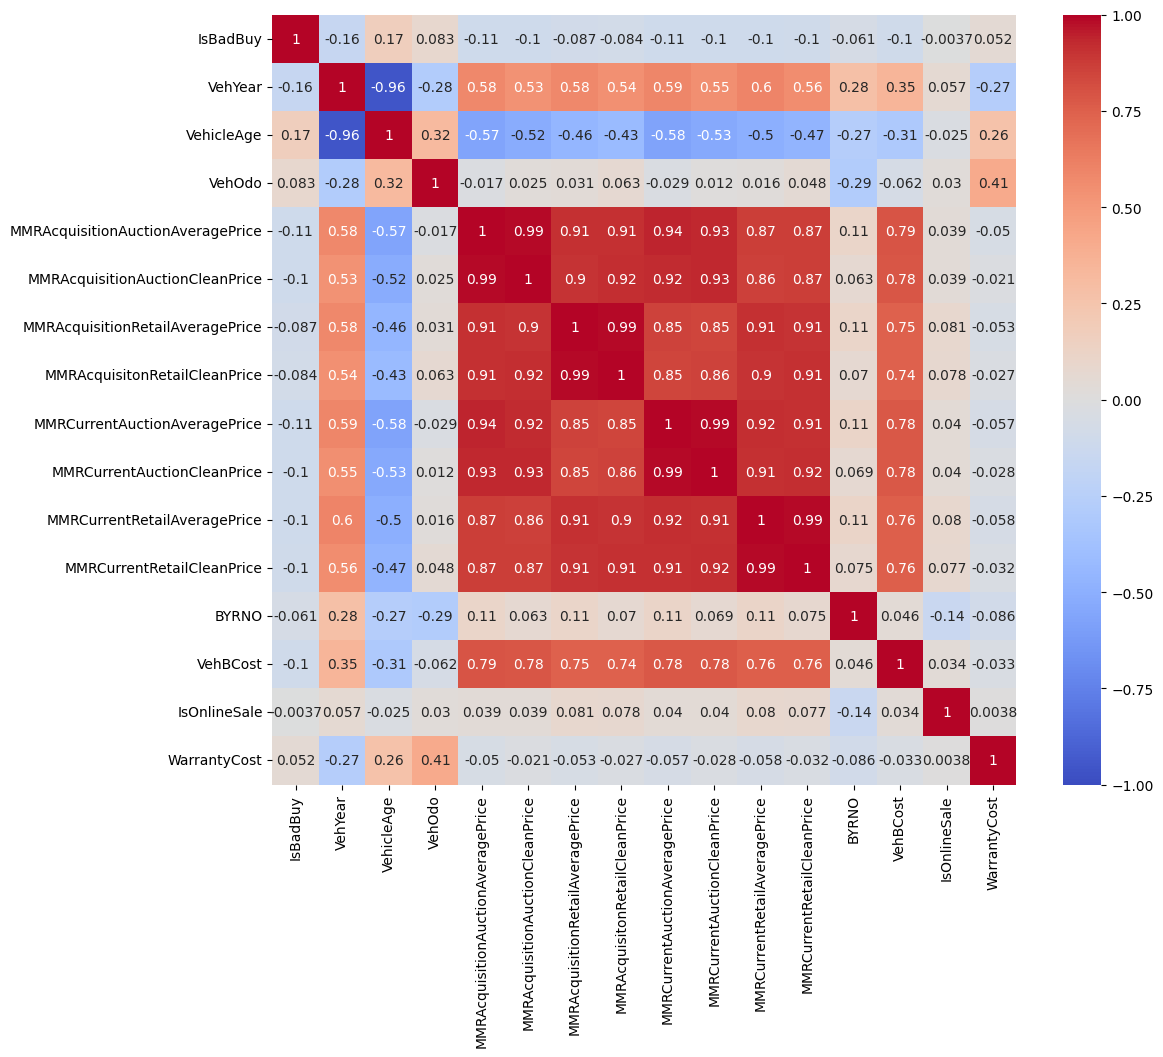

In [ ]:
correlation = datos_numericos.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation, vmin=-1, cmap='coolwarm', annot=True) #Matriz de correlación como mapa de calor
plt.show()